In [4]:
import sys
sys.path.append('../')
import scipy.io
from utils.mat_to_tfrecord_analysis import formatSessionData
from pathlib import Path
import numpy as np
import os

session = 't18.2024.12.03'
blocks = [2,3,4,5,6]
trialsToRemove = []
dataDir = str(Path('../Data', 't18', session, 'brainToText'))
data = formatSessionData(
                      blocks,
                      trialsToRemove,
                      dataDir,
                      start_offset=-250,
                      end_offset=250,
                      channels_to_exclude=[],
                      channels_to_zero=[],
                      includeThreshCrossings=True,
                      includeSpikePower=True,
                      spikePowerMax=10000,
                      globalStd=True,
                      zscoreData=True,
                      bin_compression_factor=32)

inputFeatures = data['inputFeatures']
cues = data['transcriptions']
cues = np.array([cue.strip() for cue in cues])
all_cues, counts = np.unique(cues,return_counts=True)

arrays = {'All Motor Channels' : np.arange(0,384)}

RedisMat file for block 2: ../Data/t18/t18.2024.12.03/brainToText/RedisMat/20241203_163758_(2).mat
RedisMat file for block 3: ../Data/t18/t18.2024.12.03/brainToText/RedisMat/20241203_165120_(3).mat
RedisMat file for block 4: ../Data/t18/t18.2024.12.03/brainToText/RedisMat/20241203_170328_(4).mat
RedisMat file for block 5: ../Data/t18/t18.2024.12.03/brainToText/RedisMat/20241203_172055_(5).mat
RedisMat file for block 6: ../Data/t18/t18.2024.12.03/brainToText/RedisMat/20241203_173328_(6).mat


In [5]:
mapping=  ['RIGHT PINKY - Extend Upwards',
           'RIGHT PINKY - Straight Downwards',
           'RIGHT PINKY - In to Palm',
           'RIGHT RING - Extend Upwards',
           'RIGHT RING - Straight Downwards',
           'RIGHT RING - In to Palm',
           'RIGHT MIDDLE - Extend Upwards',
           'RIGHT MIDDLE - Straight Downwards',
           'RIGHT MIDDLE - In to Palm',
           'RIGHT INDEX - Extend Upwards',
           'RIGHT INDEX - Straight Downwards',
           'RIGHT INDEX - In to Palm',
           'RIGHT THUMB - Extend Upwards',
           'RIGHT THUMB - Straight Downwards',
           'RIGHT THUMB - In to Palm',
           'LEFT PINKY - Extend Upwards',
           'LEFT PINKY - Straight Downwards',
           'LEFT PINKY - In to Palm',
           'LEFT RING - Extend Upwards',
           'LEFT RING - Straight Downwards',
           'LEFT RING - In to Palm',
           'LEFT MIDDLE - Extend Upwards',
           'LEFT MIDDLE - Straight Downwards',
           'LEFT MIDDLE - In to Palm',
           'LEFT INDEX - Extend Upwards',
           'LEFT INDEX - Straight Downwards',
           'LEFT INDEX - In to Palm',
           'LEFT THUMB - Extend Upwards',
           'LEFT THUMB - Straight Downwards',
           'LEFT THUMB - In to Palm',
           'DO NOTHING']

0.9442622950819672
[0.92786885 0.96065574]
(305, 10752)
(305,)
(305, 2)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7
  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9
  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14
 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17
 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19
 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21
 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24
 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26
 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 29 29
 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30]

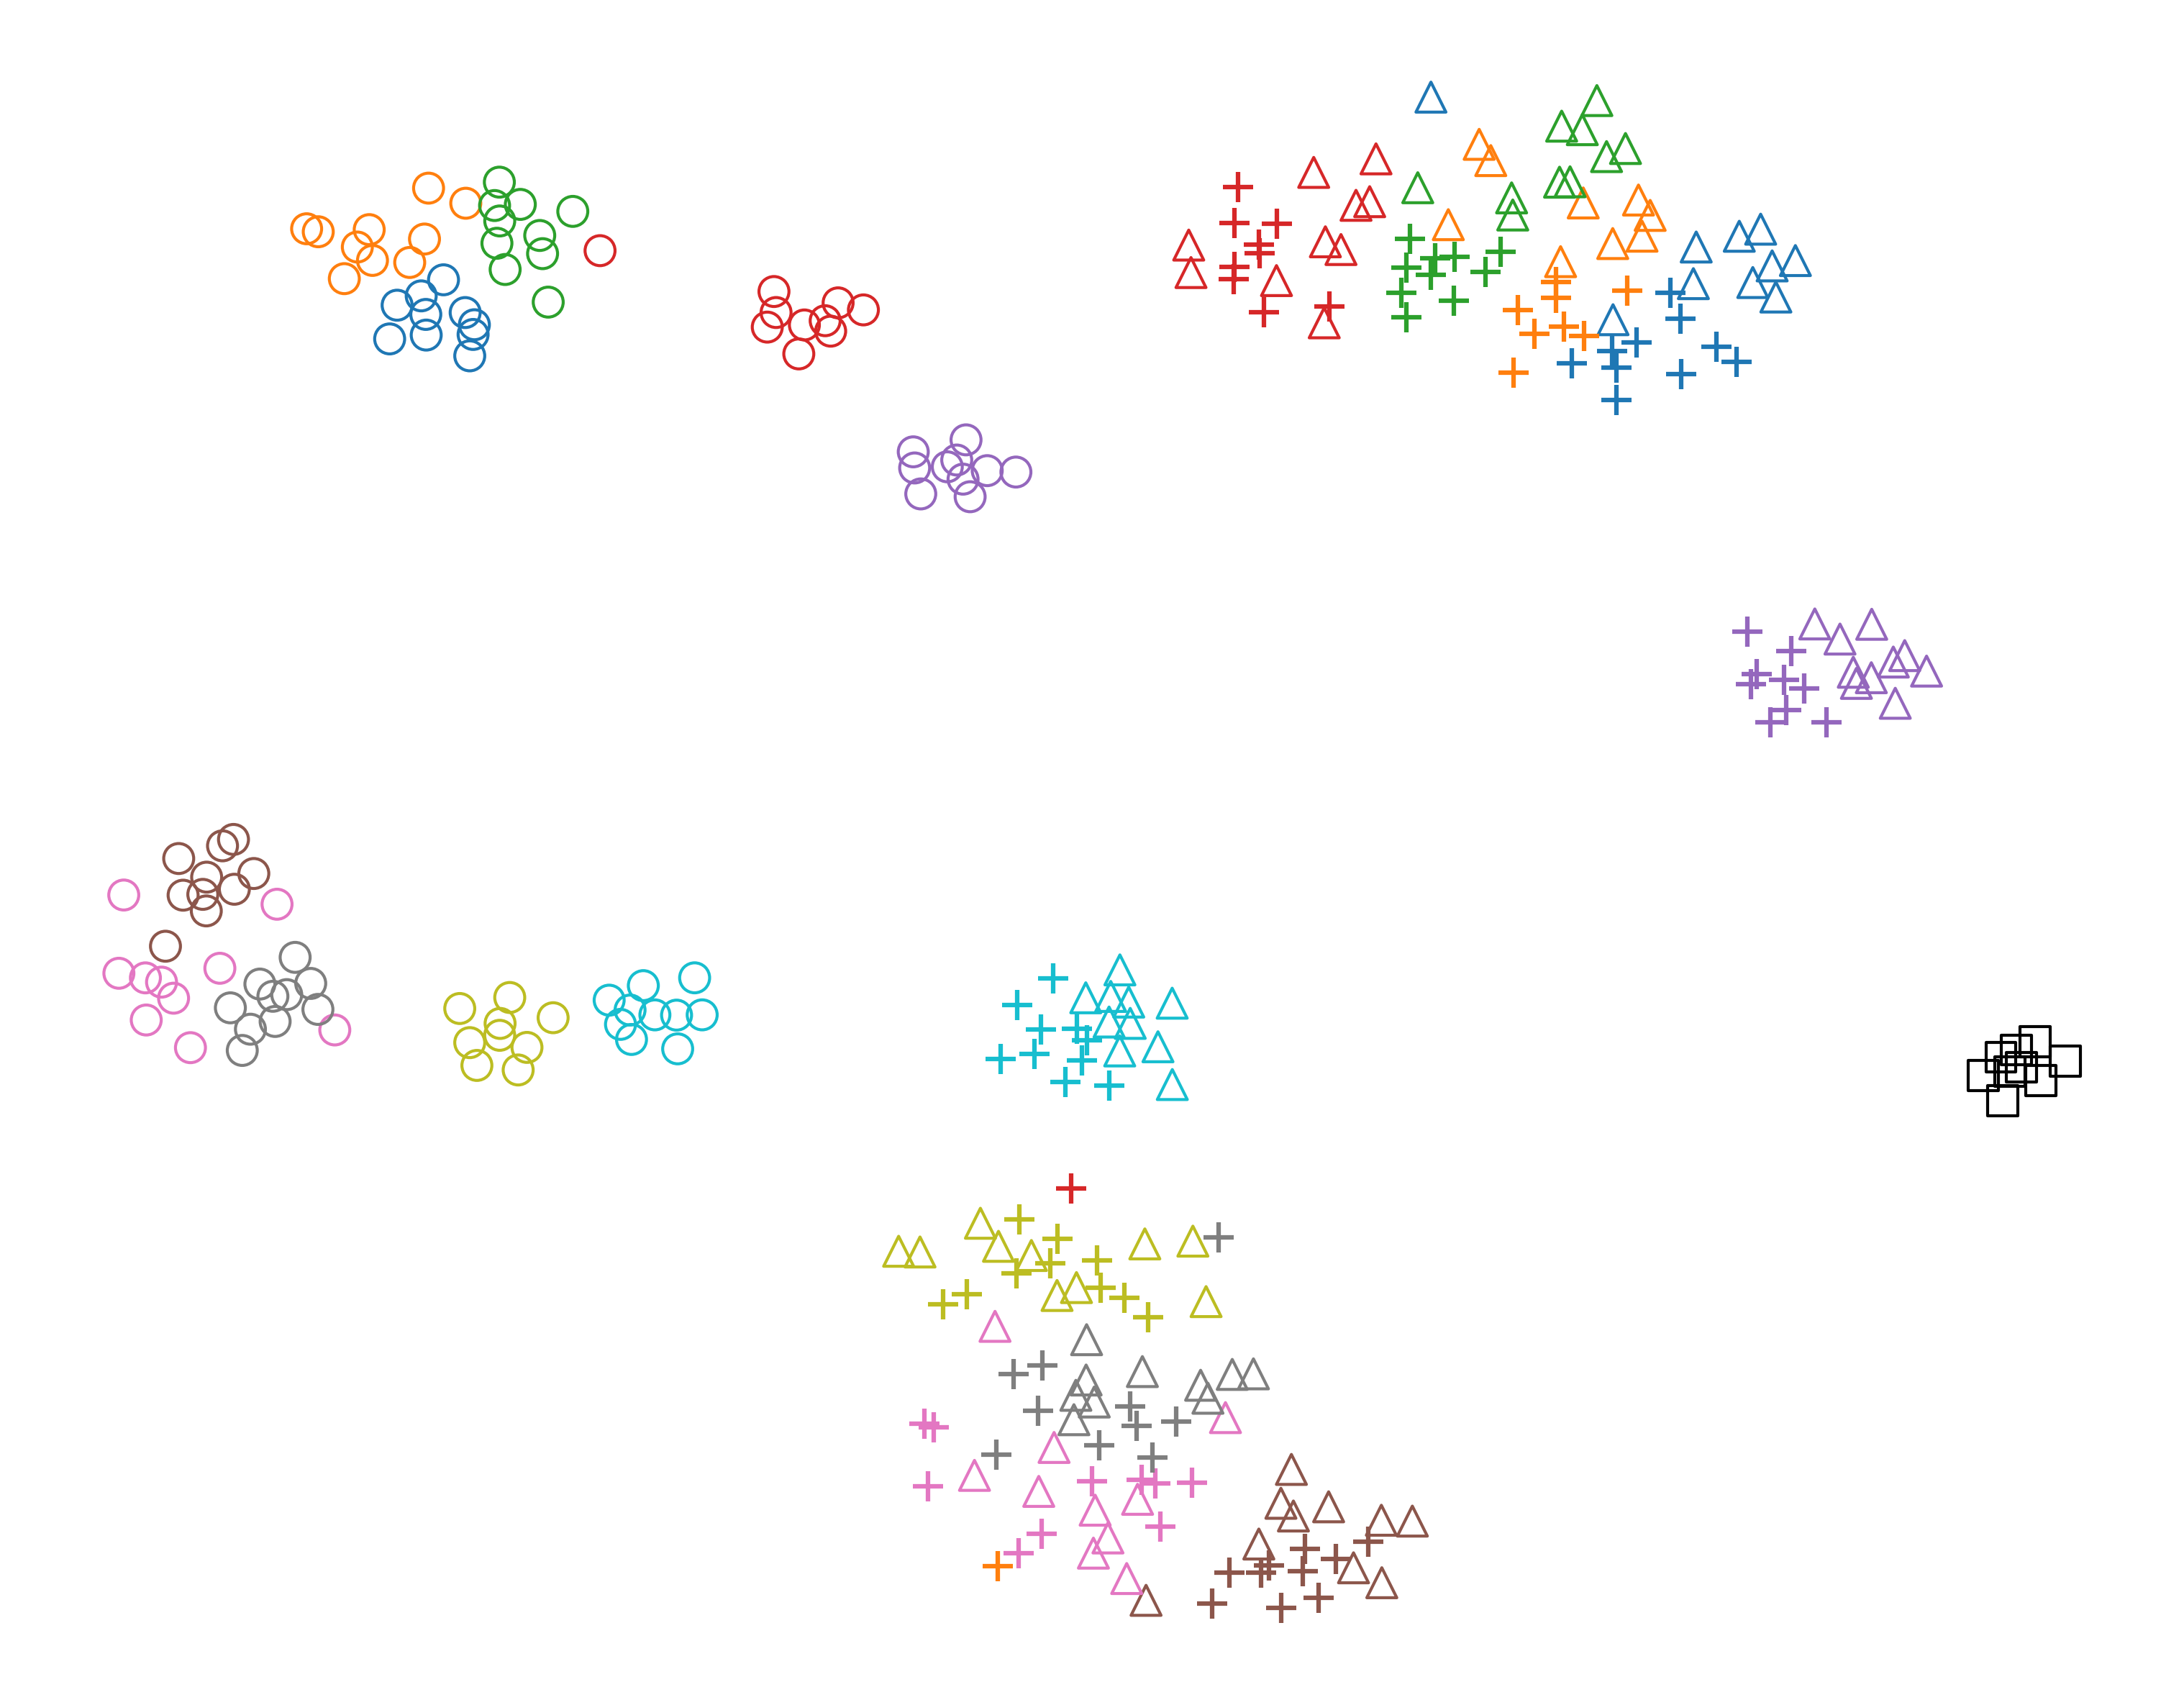

In [3]:
from utils.analysisT18 import plot_tsne

gathered_trials = []
for i, k in enumerate(mapping):
    indices = np.array(np.argwhere(cues == k)).flatten()
    all_trials_this_phone = np.zeros((indices.shape[0],  inputFeatures[0].shape[0], inputFeatures[0].shape[-1]))    
    for j, trial in enumerate(indices):
        all_trials_this_phone[j,:inputFeatures[trial].shape[0] ,:] = np.nan_to_num(inputFeatures[trial][:750, :])
    gathered_trials.append(all_trials_this_phone)
    range_to_apply_gnb = [5,19]
for array, channels_to_include in arrays.items():
    plot_tsne(gathered_trials, range_to_apply_gnb, channels_to_include.astype(np.int32), mapping)